# 1.Problem statement:
Nowadays, many companies experience customer churn, which can cause big lost in the revenue.
    
__What is churn?__
- Churn refers to the rate at which customers stop doing business with a company, often expressed as a percentage of total customers or revenue.
- Churn rate can be expressed as $$ \frac{\text{number\_of\_churn}}{\text{total\_custormer}} * 100\% $$

__Necessary of churn analysis and prediction__
- Many companies need data analysts and data scientists to find the causes of this problem and reduces the number of customer churn
- By analyzing the data of churn, companies can find the solution for this problem. Also by predicting which types of customer is likely to leave the service, companies can come up with other short-term service for them.

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_excel('02-Churn-Dataset.xlsx')
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [23]:

data['TotalCharges'] = data['TotalCharges'].replace(r'^\s*$', np.nan, regex=True)
data['TotalCharges'] = data['TotalCharges'].astype(float)
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].mean())

/var/folders/qn/zzlz3xfn3sg_7htk7xqrfzfw0000gn/T/ipykernel_3660/2951992477.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['TotalCharges'] = data['TotalCharges'].replace(r'^\s*$', np.nan, regex=True)


In [25]:
data.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,2,4,NaN,NaN,NaN,NaN,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,NaN,NaN,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,2810,2785,3875,4171,2365,NaN,NaN,NaN,NaN,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,64.761692,2283.300441,0.515689,0.419566,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,30.090047,2265.000258,1.275299,1.250117,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,0.000000,0.000000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,35.500000,402.225000,0.000000,0.000000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,70.350000,1400.550000,0.000000,0.000000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,89.850000,3786.600000,0.000000,0.000000,NaN


In [27]:
print(data.isna().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
numAdminTickets     0
numTechTickets      0
Churn               0
dtype: int64


In [29]:
print(data.duplicated().sum())

0


After having a quick overview of the dataset, we can see that there are 7043 customers in the data without missing values and duplicate data.

# 2.Data analysis

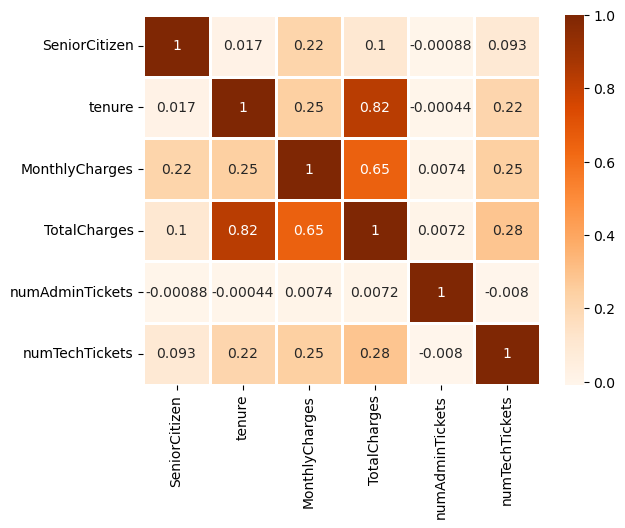

In [33]:
sns.heatmap(data.corr(numeric_only = True), cmap ='Oranges',annot= True, linewidths = 1);

After analyzing the data, we can see that the churn rate is more than 25%. Most of the churn comes from people with Senior Citizenshp = 0 and People who have the one-month contract. By showing the correlation of the data, we see that there is no linear relation between the features.

# 3. Data preprocessing

We will split the data into features and targets first. We also drop unnecessary features like CustomerID for easier data preprocessing and reduce the bias of the model.

In [39]:
# We will split the data by the features and the targets.
x = data.drop(["customerID","Churn"],axis=1)
y = data["Churn"]

In [41]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,5
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,0,0


In [43]:
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [45]:
# We split the data into train set and test set. 80% of the data will be used for training.
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,random_state = 42,train_size= 0.8) 

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [49]:
num_transform = Pipeline(steps =[
    ("scaler",StandardScaler())
])
ordinal_transform = Pipeline(steps =[
    ("ord_encode",OrdinalEncoder(categories=[x["InternetService"].unique(),x["Contract"].unique()]))
])
nominal_transform = Pipeline(steps = [
    ("nom_encode",OneHotEncoder(categories= [x["gender"].unique(),x["Partner"].unique(),x["Dependents"].unique(),x["MultipleLines"].unique(),x["OnlineSecurity"].unique(),x["OnlineBackup"].unique(),x["DeviceProtection"].unique(),x["TechSupport"].unique(),x["StreamingTV"].unique(),x["StreamingMovies"].unique(),x["PaperlessBilling"].unique(),x["PaymentMethod"].unique()]))
])

In [55]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ("num_features",num_transform,["tenure","MonthlyCharges","TotalCharges"]),
    ("ord_features",ordinal_transform,["InternetService","Contract"]),
    ("nom_features",nominal_transform,["gender","Partner","Dependents","MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","PaperlessBilling","PaymentMethod"])
])

# 3. Building model and predict

Because the data is not linearly dependent so we will use other classfication algorithms like SVC, Decision Tree. Below I use the SVC model

In [57]:
from sklearn.svm import SVC
clf_1 = Pipeline (steps =[
    ("preprocessor",preprocessor),
    ("model",SVC())
])
clf_1.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_features',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('ord_features',
                                                  Pipeline(steps=[('ord_encode',
                                                                   OrdinalEncoder(categories=[array(['DSL', 'Fiber optic', 'No'], dtype=object),
                                                                                              array(['Month-to-month', 'One year', 'Two year'], dtype=object)]))...
                                                                                             array(['No', 'Yes', 'No internet service'], dtype=object),
                                                                                             array(['Yes', 'No'], dtype=object),
                                                                                             array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)]))]),
                                                  ['gender', 'Partner',
                                                   'Dependents',
                                                   'MultipleLines',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('model', SVC())])

In [61]:
from sklearn.metrics import classification_report
y_predict = clf_1.predict(x_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

          No       0.84      0.92      0.88      1036
         Yes       0.70      0.52      0.60       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409

